In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load the dataset
data = pd.read_csv('crop.csv')

# Display the first few rows of the dataset
print(data.head())

# Assuming the target variable is named 'label' and the rest are features
X = data.drop('label', axis=1)
y = data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the model and the scaler
joblib.dump(clf, 'crop_recommendation_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved!")

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
Accuracy: 0.9931818181818182
Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybea

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
SVM Accuracy: 0.9772727272727273
SVM Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.85      0.96      0.90        23
 k

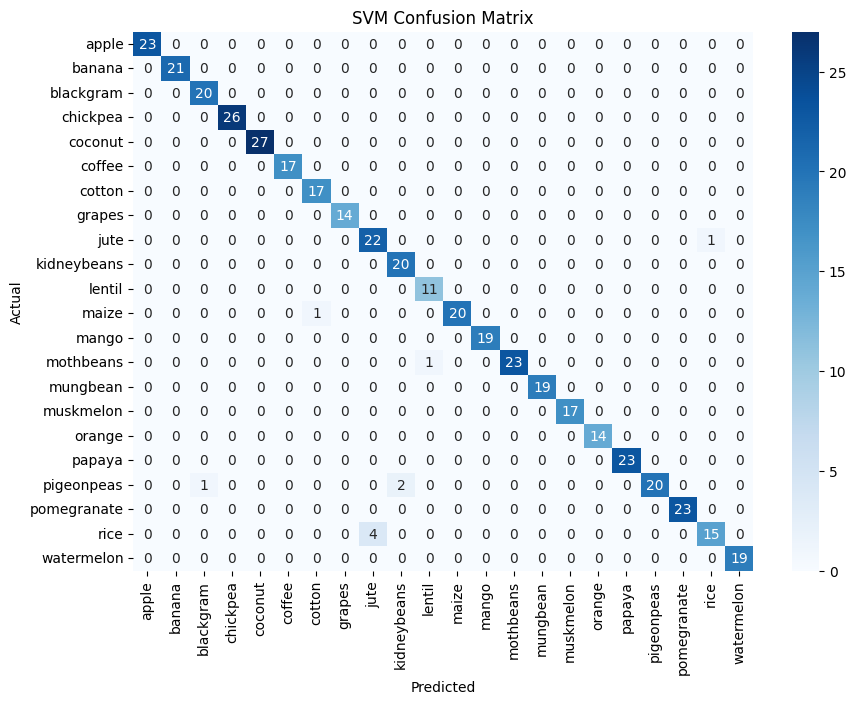

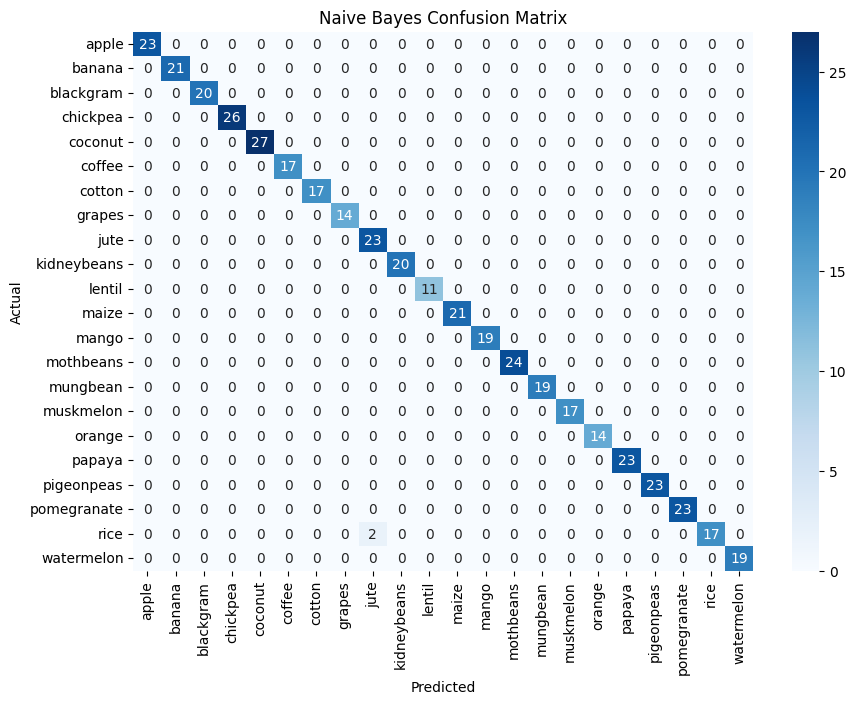

SVM Conditional Probabilities:
       apple    banana  blackgram  chickpea   coconut    coffee    cotton  \
0  0.000620  0.002814   0.001277  0.000556  0.001430  0.001863  0.004724   
1  0.000534  0.001367   0.000799  0.000540  0.001553  0.002526  0.003381   
2  0.000556  0.002239   0.005130  0.000249  0.001673  0.000985  0.001533   
3  0.001345  0.005123   0.009703  0.000882  0.003552  0.001076  0.001366   
4  0.948143  0.008262   0.002400  0.002408  0.001383  0.001011  0.001273   

     grapes      jute  kidneybeans  ...     mango  mothbeans  mungbean  \
0  0.000678  0.001504     0.000598  ...  0.000936   0.001215  0.002730   
1  0.000533  0.001489     0.000575  ...  0.001168   0.001015  0.002350   
2  0.000750  0.001868     0.000336  ...  0.001256   0.000977  0.003231   
3  0.001452  0.003777     0.000891  ...  0.003005   0.003586  0.013533   
4  0.005547  0.003773     0.000974  ...  0.001025   0.001144  0.001786   

   muskmelon    orange    papaya  pigeonpeas  pomegranate      ric

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('crop.csv')

# Display the first few rows of the dataset
print(data.head())

# Assuming the target variable is named 'label' and the rest are features
X = data.drop('label', axis=1)
y = data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Support Vector Machine Classifier
svm_clf = SVC(kernel='linear', probability=True, random_state=42)
svm_clf.fit(X_train, y_train)

# Train a Naive Bayes Classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

# Make predictions on the test set using SVM
svm_y_pred = svm_clf.predict(X_test)

# Make predictions on the test set using Naive Bayes
nb_y_pred = nb_clf.predict(X_test)

# Evaluate the SVM model
print("SVM Accuracy:", accuracy_score(y_test, svm_y_pred))
print("SVM Classification Report:\n", classification_report(y_test, svm_y_pred))

# Evaluate the Naive Bayes model
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_y_pred))
print("Naive Bayes Classification Report:\n", classification_report(y_test, nb_y_pred))

# Confusion Matrix for SVM
svm_conf_matrix = confusion_matrix(y_test, svm_y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=svm_clf.classes_, yticklabels=svm_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix')
plt.show()

# Confusion Matrix for Naive Bayes
nb_conf_matrix = confusion_matrix(y_test, nb_y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=nb_clf.classes_, yticklabels=nb_clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Confusion Matrix')
plt.show()

# Calculate conditional probabilities for SVM
svm_probabilities = svm_clf.predict_proba(X_test)
svm_prob_df = pd.DataFrame(svm_probabilities, columns=svm_clf.classes_)
print("SVM Conditional Probabilities:\n", svm_prob_df.head())

# Calculate conditional probabilities for Naive Bayes
nb_probabilities = nb_clf.predict_proba(X_test)
nb_prob_df = pd.DataFrame(nb_probabilities, columns=nb_clf.classes_)
print("Naive Bayes Conditional Probabilities:\n", nb_prob_df.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
Accuracy: 0.9772727272727273
Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       0.94      1.00      0.97        17
      grapes       1.00      1.00      1.00        14
        jute       0.85      0.96      0.90        23
 kidneybea

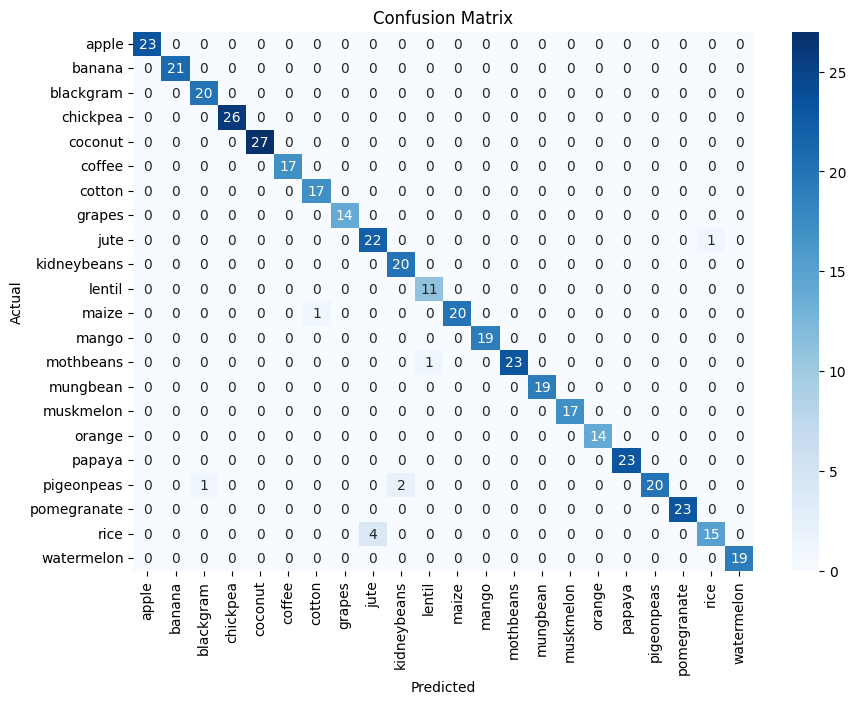

Conditional Probabilities:
       apple    banana  blackgram  chickpea   coconut    coffee    cotton  \
0  0.000620  0.002814   0.001277  0.000556  0.001430  0.001863  0.004724   
1  0.000534  0.001367   0.000799  0.000540  0.001553  0.002526  0.003381   
2  0.000556  0.002239   0.005130  0.000249  0.001673  0.000985  0.001533   
3  0.001345  0.005123   0.009703  0.000882  0.003552  0.001076  0.001366   
4  0.948143  0.008262   0.002400  0.002408  0.001383  0.001011  0.001273   

     grapes      jute  kidneybeans  ...     mango  mothbeans  mungbean  \
0  0.000678  0.001504     0.000598  ...  0.000936   0.001215  0.002730   
1  0.000533  0.001489     0.000575  ...  0.001168   0.001015  0.002350   
2  0.000750  0.001868     0.000336  ...  0.001256   0.000977  0.003231   
3  0.001452  0.003777     0.000891  ...  0.003005   0.003586  0.013533   
4  0.005547  0.003773     0.000974  ...  0.001025   0.001144  0.001786   

   muskmelon    orange    papaya  pigeonpeas  pomegranate      rice  \

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('crop.csv')

# Display the first few rows of the dataset
print(data.head())

# Assuming the target variable is named 'label' and the rest are features
X = data.drop('label', axis=1)
y = data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Support Vector Machine Classifier
clf = SVC(kernel='linear', probability=True, random_state=42)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=clf.classes_, yticklabels=clf.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate conditional probabilities
probabilities = clf.predict_proba(X_test)
prob_df = pd.DataFrame(probabilities, columns=clf.classes_)
print("Conditional Probabilities:\n", prob_df.head())